# Decision tree 🌳

## Introduction

   You work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given customer feedback given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

**Steps followings :**

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a decision tree model 
* Tuning hyperparameters using `GridSearchCV`
* Evaluating a decision tree model using a confusion matrix and various other plots

## Imports 🚢

In [1]:
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
df_original = pd.read_csv("Invistico_Airline.csv")
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


## Data exploration, data cleaning, and model preparation 🔍

### Explore the data

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

### Output unique values 

The `Class` column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the `Class` column. 

In [4]:
df_original['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

### Check the counts of the predicted labels 

In [5]:
print('The Number of Satisfaction & Dissatisfaction count is: ',df_original['satisfaction'].value_counts())
print('The Percentage of Satisfaction & Dissatisfaction is: ',df_original['satisfaction'].value_counts(normalize=True)*100)

The Number of Satisfaction & Dissatisfaction count is:  satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64
The Percentage of Satisfaction & Dissatisfaction is:  satisfied       54.73283
dissatisfied    45.26717
Name: satisfaction, dtype: float64


### Check for missing values

In [6]:
df_original.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [7]:
# Check the number of rows and columns in the dataset
df_original.shape

(129880, 22)

### Drop the rows with missing values

In [8]:
df_subset = df_original.dropna(axis=0).reset_index(drop=True)

In [9]:
# Check for missing values
df_subset.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [10]:
##Check the dataset again
df_subset.shape

(129487, 22)

### Encode the data

In [11]:
#converting the ordinal `Class` column into numeric.
df_subset['Class'] = df_subset['Class'].map({"Business": 3, "Eco Plus": 2, "Eco": 1})


df_subset['satisfaction'] = np.where(df_subset['satisfaction']=='satisfied', 1, 0)
df_subset.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Loyal Customer,65,Personal Travel,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Loyal Customer,47,Personal Travel,3,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Loyal Customer,15,Personal Travel,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Loyal Customer,60,Personal Travel,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Loyal Customer,70,Personal Travel,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [12]:
# Convert categorical columns into numeric
df_subset = pd.get_dummies(df_subset, drop_first=True)

In [13]:
#data types
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  int32  
 1   Age                                129487 non-null  int64  
 2   Class                              129487 non-null  int64  
 3   Flight Distance                    129487 non-null  int64  
 4   Seat comfort                       129487 non-null  int64  
 5   Departure/Arrival time convenient  129487 non-null  int64  
 6   Food and drink                     129487 non-null  int64  
 7   Gate location                      129487 non-null  int64  
 8   Inflight wifi service              129487 non-null  int64  
 9   Inflight entertainment             129487 non-null  int64  
 10  Online support                     129487 non-null  int64  
 11  Ease of Online booking             1294

### Create the training and testing data

In [14]:
#target variable
y=df_subset['satisfaction']

#predict variable
x=df_subset.drop('satisfaction', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## Model building 🤖

In [15]:
# Fit a decision tree classifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
dt_pred = tree.predict(x_test)

## Results and evaluation 🧪

In [25]:
print("The Accuray is    ", "%.3f" % accuracy_score(dt_pred, y_test))
print("The Precision is  ", "%.3f" % precision_score(dt_pred, y_test))
print("The Recall is     ", "%.3f" % recall_score(dt_pred, y_test))
print("The F1 score is   ", "%.3f" % f1_score(dt_pred, y_test))

The Accuray is     0.936
The Precision is   0.942
The Recall is      0.940
The F1 score is    0.941


### Produce a confusion matrix

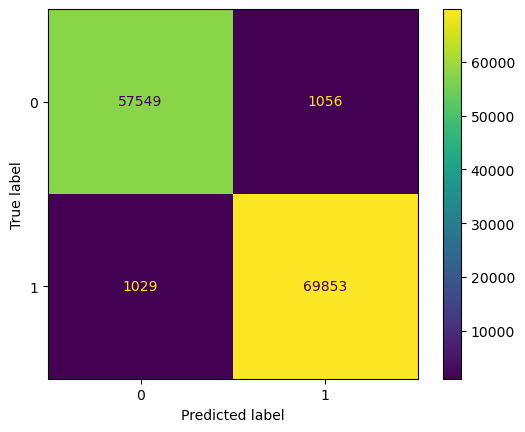

In [17]:
def confusion_plot(model, x_data, y_data):
    '''Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    '''

    model_pred = model.predict(x_data)
    cm = confusion_matrix( y_data, model_pred, labels=model.classes_)
    dspl = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    dspl.plot(values_format='')
    plt.show()
    
    
confusion_plot(tree, x, y)

**Question:** What patterns can you identify between true positives and true negatives, as well as false positives and false negatives?

In the confusion matrix, there are a high proportion of true positives and true negatives (where the matrix accurately predicted that the customer would be satisfied or dissatified, respectively). 

The matrix also had a relatively low number of false positives and false negatives (where the matrix innacurately predicted that the customer would be satisfied or dissatified, respectively.) 

### Plot the decision tree

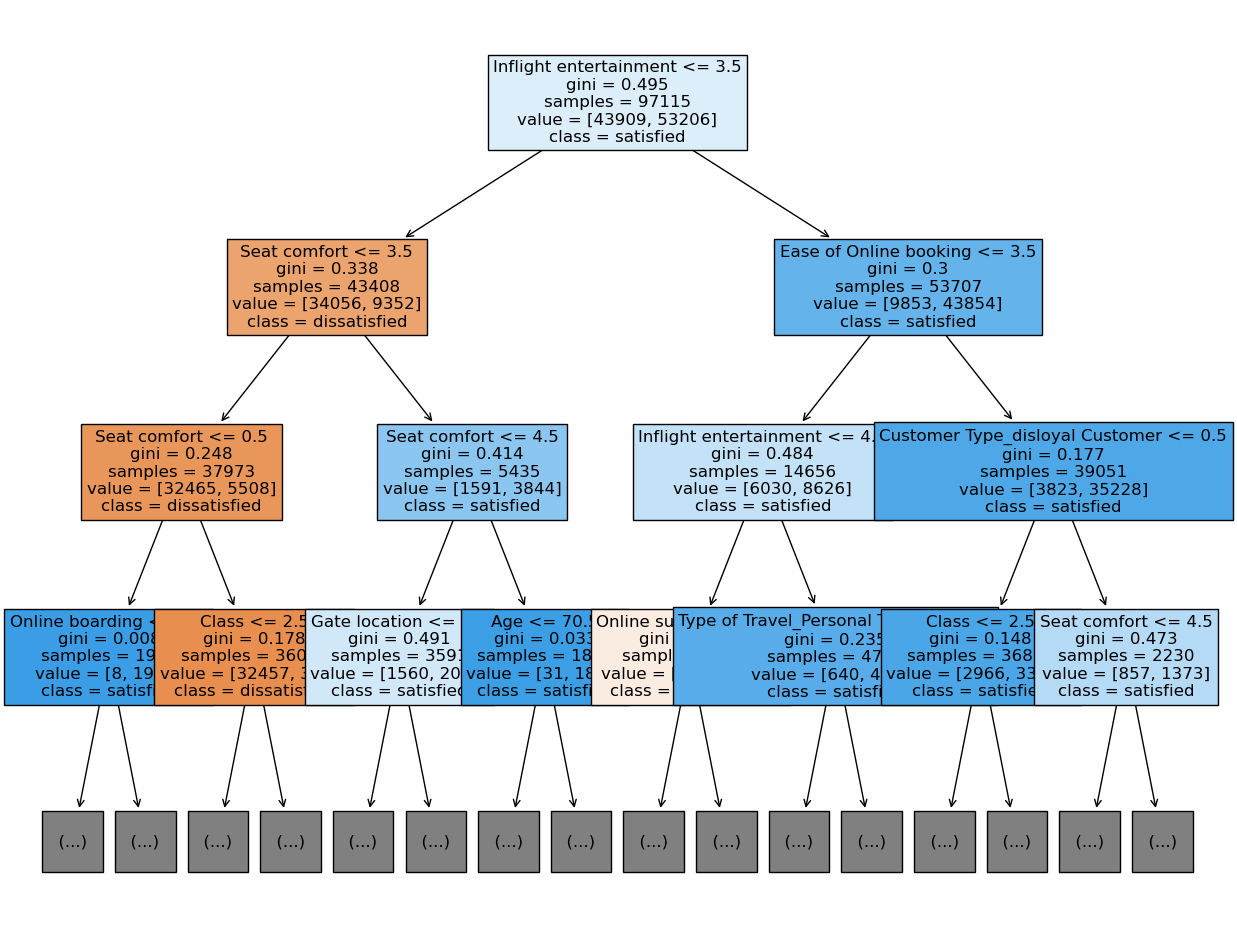

In [18]:
plt.figure(figsize=(15,12))
plot_tree(tree, max_depth=3, fontsize=12, feature_names=x.columns,
         class_names= {1:"satisfied", 0:"dissatisfied"}, filled=True);
plt.show()

### Hyperparameter tuning

In [19]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

### Check combinations of values

In [20]:
tuned_tree = DecisionTreeClassifier(random_state=0)

%timeit
clf=GridSearchCV(tuned_tree, tree_para,
                scoring=scoring, cv=5,
                refit='f1')
clf.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring={'f1', 'recall', 'accuracy', 'precision'})

**Question:** How can you determine the best combination of values for the hyperparameters? 

Use the best estimator tool to help uncover the best pair combination.

In [21]:
# best combination of values
clf.best_estimator_

DecisionTreeClassifier(max_depth=16, min_samples_leaf=9, random_state=0)

**Question:** What is the best combination of values for the hyperparameters? 

After running the DecisionTreeClassifier, the maximum depth is 18 and the minimum number of samples is two, meaning this is the best combination of values. 

In [22]:
#best average validation score
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9434


### "Best" decision tree model's accuracy, precision, recall, and F1 score 

In [27]:
def make_results(model_name, model_object):

    # Get all the results from the CV and put them in a df
    cv_result = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score
    best_estimator = cv_result.iloc[cv_result['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator.mean_test_f1
    recall = best_estimator.mean_test_recall
    precision = best_estimator.mean_test_precision
    accuracy = best_estimator.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model_Name': model_name,
                         'F1_score':f1,
                         'Accuracy':accuracy,
                         'precision':precision,
                         'Recall':recall}, ignore_index=True)
    return table

make_results('Tuned Desicion Tree', clf)

C:\Users\KirubaSagar\AppData\Local\Temp\ipykernel_9676\626725838.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model_Name': model_name,


,Model_Name,F1_score,Accuracy,precision,Recall
0,Tuned Desicion Tree,0.943384,0.938475,0.951265,0.935646


**Question:** Was the additional performance improvement from hyperparameter tuning worth the computational cost? Why or why not?

The F1 score for the decision tree that was not hyperparameter tuned is 0.940940 and the F1 score for the hyperparameter-tuned decision tree is 0.945422. While ensuring that overfitting doesn't occur is necessary for some models, it didn't make a meaningful difference in improving this model. 

### Plot the "best" decision tree 🌳🌳

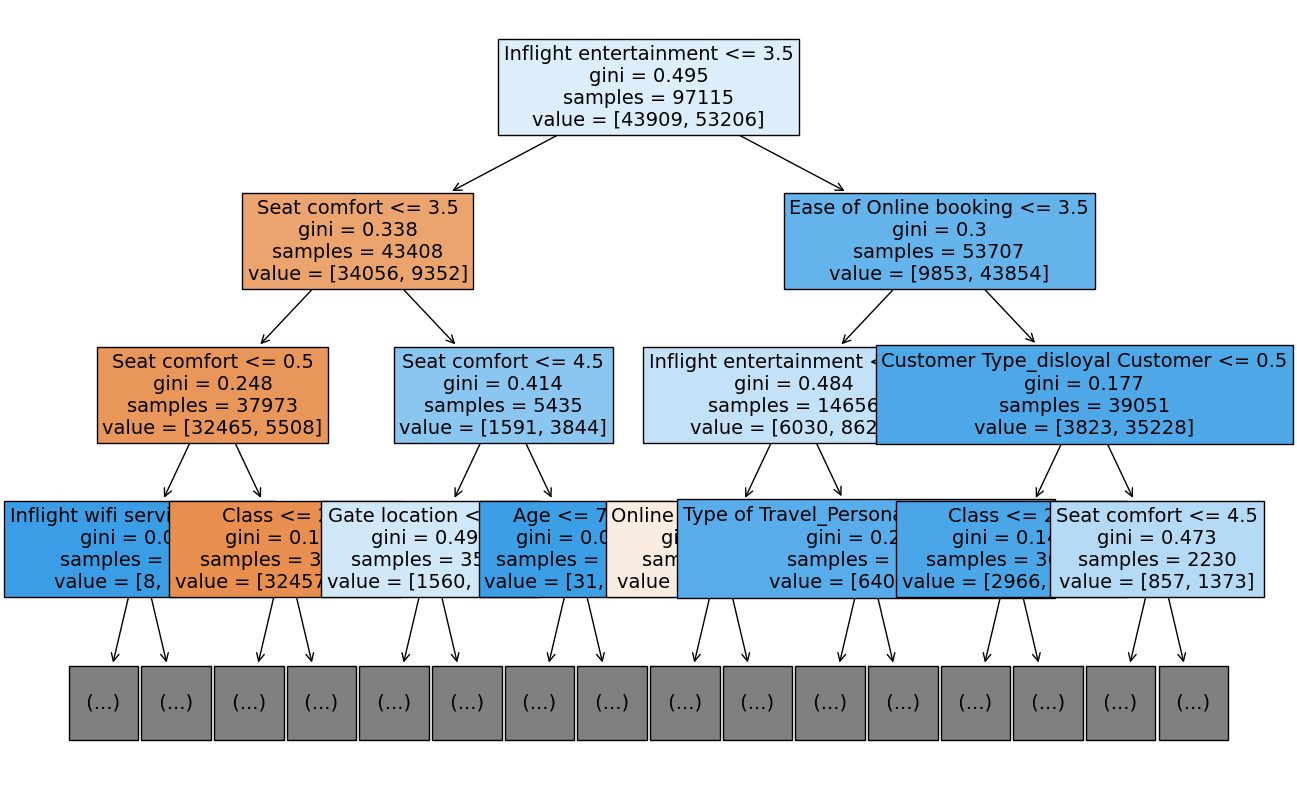

In [30]:
plt.figure(figsize=(15,10))
plot_tree(clf.best_estimator_ , max_depth= 3, fontsize=14, feature_names=x.columns, filled=True)
plt.show()

Which features did the model use first to sort the samples?

The model choose to sort the inflight `entertainment`

## Conclusion

**What findings would you share with others?**

*   Decision trees accurately predicted satisfaction over 94 percent of the time.  
*   The confusion matrix is useful as it shows a similar number of true positives and true negatives. 
*   The visualization of the decision tree and the feature importance graph both suggest that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the most important features in the model.

**What would you recommend to stakeholders?**
 
*  Customer satisfaction is highly tied to `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'`. Improving these experiences should lead to better customer satisfaction. 
*  The success of the model suggests that the airline should invest more effort into model building and model understanding since this model semed to be very good at predicting customer satisfaction. 